# Identify Fraud form Enron Email

### Overview

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. 

This project will analyze the dataset provided and create an algorithm to identify potential employees that may have committed fraud during the scandal.

-----------------------------------------------------------------------------------------------------

### Importing Libraries and Dataset

In [32]:
import sys
import pickle
import pandas as pd
import numpy as np
from pprint import pprint 
import matplotlib.pyplot as plt
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

df = pd.DataFrame.from_dict(data_dict, orient='index')  #creating dataframe from dict


Now that we've imported our dataset, we want to explore the data and answer a few questions.

### Number of Entries

In [33]:
print "There are", len(data_dict), "people in the dataset."

There are 146 people in the dataset.


### List of Names

To get a better visual of only the names included in the dataset, I ordered the keys in alphabetical order, based on last name.  

In [34]:
pprint(sorted(data_dict.keys(), key=lambda x: x[0]))

['ALLEN PHILLIP K',
 'BAXTER JOHN C',
 'BLACHMAN JEREMY M',
 'BELFER ROBERT',
 'BERGSIEKER RICHARD P',
 'BIBI PHILIPPE A',
 'BECK SALLY W',
 'BERBERIAN DAVID',
 'BANNANTINE JAMES M',
 'BUTTS ROBERT H',
 'BOWEN JR RAYMOND M',
 'BAZELIDES PHILIP J',
 'BELDEN TIMOTHY N',
 'BLAKE JR. NORMAN P',
 'BROWN MICHAEL',
 'BADUM JAMES P',
 'BHATNAGAR SANJAY',
 'BUCHANAN HAROLD G',
 'BAY FRANKLIN R',
 'BUY RICHARD B',
 'CORDES WILLIAM R',
 'COLWELL WESLEY',
 'CHAN RONNIE',
 'CLINE KENNETH W',
 'CUMBERLAND MICHAEL S',
 'CALGER CHRISTOPHER F',
 'COX DAVID',
 'CHRISTODOULOU DIOMEDES',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'DETMERING TIMOTHY J',
 'DUNCAN JOHN H',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DURAN WILLIAM D',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DIETRICH JANET R',
 'DERRICK JR. JAMES V',
 'DONAHUE JR JEFFREY M',
 'ELLIOTT STEVEN',
 'ECHOLS JOHN B',
 'FITZGERALD JAY L',
 'FASTOW ANDREW S',
 'FOY JOE',
 'FOWLER PEGGY',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'FALLON JAMES B',
 'GIBBS

### Number of Features 

To find the number of features in our dataset, I will be using one of the people and populating their features.  Phillip K. Allen is the first name in the sorted list of keys, so we will use him.

In [35]:
pprint(data_dict['ALLEN PHILLIP K'])

{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}


In [36]:
print "There are", len(data_dict['ALLEN PHILLIP K'].keys()), "features in the dataset."

There are 21 features in the dataset.


### Finding Missing Values



In [37]:
df = df.replace('NaN', np.nan)
print df.isnull().sum()

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 35
from_poi_to_this_person       60
dtype: int64


It looks like there are a lot of NaN values in our dataset.  This doesn't mean that everyone with a missing value should be removed because they can still hold valuable information that will help us later.

### Discovering Outliers in the Financial Data

While doing a quick scan of the names list, I noticed two abnormalities, "TOTAL" and "THE TRAVEL AGENCY IN THE PARK".  "THE TRAVEL AGENCY IN THE PARK" is not a name and looks to be an entry that was put into the wrong dataset, so this one will be removed from the dictionary.  

In [38]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}


'TOTAL' on the other hand could potentially have some important data for us so we can plot some features using a scatterplot.  Since a bonus is generally associated with salary and are sources of financial data, we can plot these two features to give us a visual representation.

I will be using the dataframe created from the original dataset.

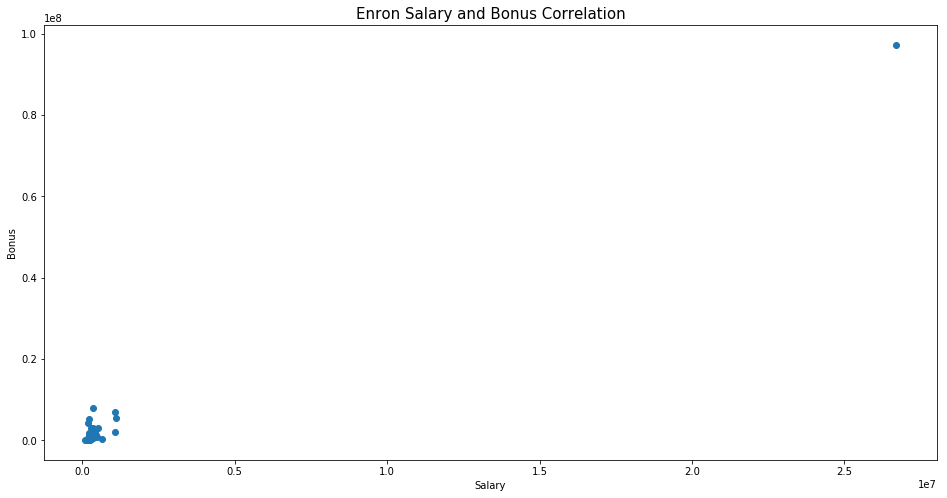

In [39]:
plt.figure(figsize = (16, 8))
#Giving labels for title, x, and y then changing their font size
plt.title('Enron Salary and Bonus Correlation', fontsize = 15)
plt.xlabel('Salary', fontsize = 10)
plt.ylabel('Bonus', fontsize = 10)

#plotting the dataframe
plt.scatter(df.salary, df.bonus)
plt.show()

By looking at the graph, there is an obvious outlier in the data.  The values for the outlier are much, much higher than every other point in the dataframe.  This is making me wonder if this could be the 'TOTAL' key from the dictionary, since total is defined as the sum or whole amount of something, and it was already a questionable key.  Let's look into this by viewing the person with the maximum salary in our data.

In [40]:
df['salary'].idxmax() # highest salary

'TOTAL'

TOTAL is the outlier.  It is by far the highest salary and will be removed from our dictionary.

In [41]:
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

To ensure our outlier has been removed, let's replot the same graph.  First, we need to update our dataframe to make sure the removed values from the dictionary carry over.

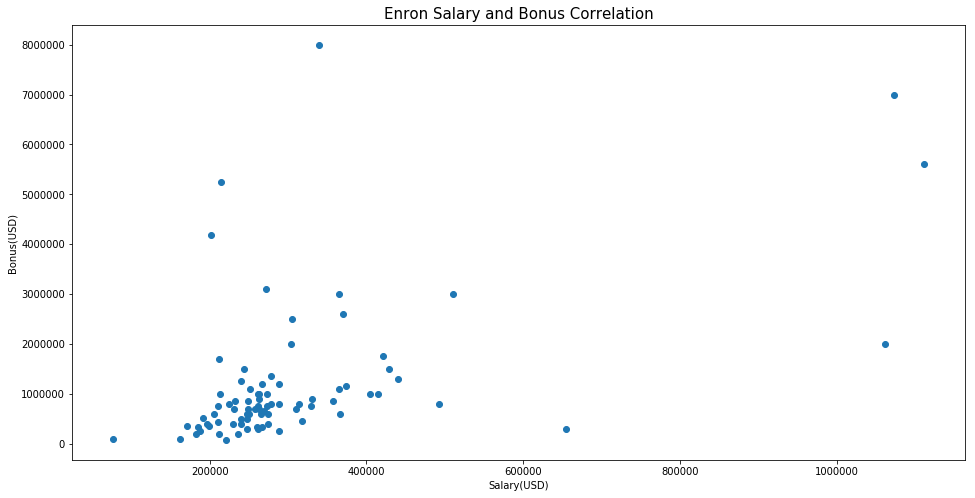

In [42]:
updated_df = pd.DataFrame.from_dict(data_dict, orient='index')

plt.figure(figsize = (16, 8))
#Giving labels for title, x, and y then changing their font size
plt.title('Enron Salary and Bonus Correlation', fontsize = 15)
plt.xlabel('Salary(USD)', fontsize = 10)
plt.ylabel('Bonus(USD)', fontsize = 10)

#plotting the dataframe
plt.scatter(updated_df.salary, updated_df.bonus)
plt.show()

After updating our dataframe with the new dictionary, our dataset looks to be much cleaner. Our x and y axis has scaled down to accompany the remaining values and is much easier to comprehend.  We can see that there are now about four new outliers that popped up.  

One of the outliers has a bonus that is 8 million and their salary is under 600,000 so that is very questionable.  The other three outliers appear to have a much higher salary(over 1 million) than all the other points, so we can look into these.

In [43]:
for i in data_dict: # keys/persons
    bonus_amount = data_dict[i]['bonus']  
    if bonus_amount >= 7500000 and bonus_amount != 'NaN':      
        print i
        print data_dict[i]['bonus']


LAVORATO JOHN J
8000000


Our extreme bonus to salary ratio belongs to John J. Lavorato.  Now let's see who the other three outliers are with their +1mil salary.

In [44]:
for i in data_dict:
    big_salary = data_dict[i]['salary']  
    if big_salary >= 1000000 and big_salary != 'NaN':      
        print i
        print data_dict[i]['salary']

LAY KENNETH L
1072321
SKILLING JEFFREY K
1111258
FREVERT MARK A
1060932


It looks like we found our other three outliers. Even though they aren't similar to the other keys from the dicitonary, we want to keep these for our study.  They could be ones who played a major role in the whole Enron scandal.

### Number of POI (Persons of Interest)

One of the features of each person determines whether or not they are a POI. Let's find how many there are.

In [45]:
poi_count = 0
non_poi_count = 0
for i in data_dict:
    if data_dict[i]['poi'] == True:
        poi_count += 1
    elif data_dict[i]['poi'] == False:
        non_poi_count +=1
print "There are " + str(poi_count) + " POI and " + str(non_poi_count) + " non POI in the dataset."


There are 18 POI and 126 non POI in the dataset.


We removed 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK' from the original dataset so our updated total number of people is 144 instead of 146. Let's see the percentage of POI.

In [46]:
print round(float(poi_count)/float(non_poi_count), 2) # round to two decimal places

0.14


In our data, about **14%** of people are marked as POI, leaving around **86%** as non POI. 

### Feature Selection

There are a total of 21 features in our dataset.  Some are going to be more important than others, so for this section we will explore what we have, what features we could potentially create, and which ones we could classify as most important for our study.

#### Exploring a Couple Features

I want to look at how POI and non POI emails are distributed. I have a feeling that we would see higher activity around the POI due to how much fraud they committed during the scandal and find other potential POIs due to higher email activity communicating to current POI, so it would make sense to me that features around this could help us in our upcoming tests. We will plot the features **'from_poi_to_this_person'** and **'from_this_person_to_poi'** to see if there is any pattern in the data.



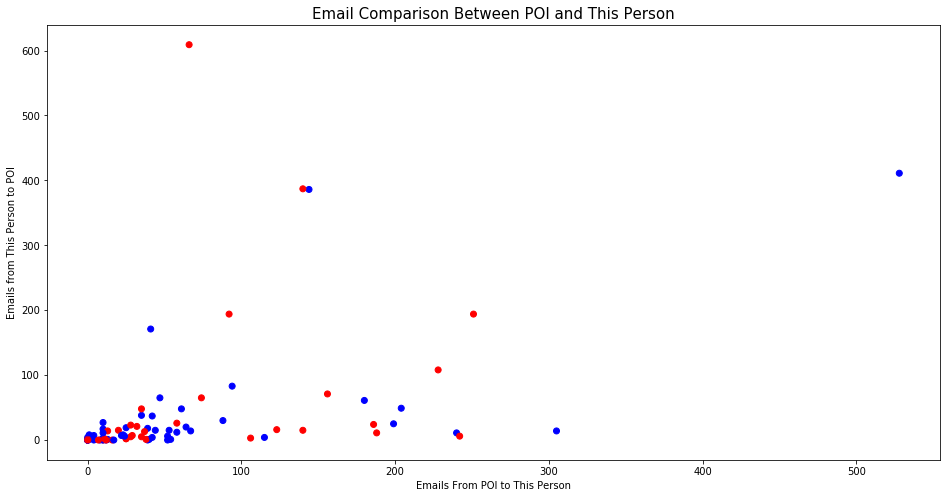

In [47]:
updated_df = pd.DataFrame.from_dict(data_dict, orient='index') # updated dataframe from dictionary with removed outliers

plt.figure(figsize = (16, 8))
#Giving labels for title, x, and y then changing their font size
plt.title('Email Comparison Between POI and This Person', fontsize = 15)
plt.xlabel('Emails From POI to This Person', fontsize = 10) # blue
plt.ylabel('Emails from This Person to POI', fontsize = 10) # red

#plotting the dataframe
plt.scatter(updated_df.from_poi_to_this_person, updated_df.from_this_person_to_poi, c =['blue','red'])
plt.show()

This scatter is displaying a comparison of POI vs Non POI email activity.  It shows us that there isnt much of a pattern that separates them from one another, so these aren't very helpful.  Let's try one more possibility of a better pattern.  We can see what fraction of emails are from this person to a POI and a fraction of emails from a POI to this person.   This would make us two new features to add to our list. If we find a strong enough pattern to aid in our testing, we will keep them.


#### Creating New Features

In [48]:
def fraction_of_emails( sent_messages, total_messages ): #function to divide and find fraction

    fraction = 0
    if sent_messages == "NaN":  # change NaN to 0 for fraction function to work properly
        sent_messages = 0 
    if total_messages == "NaN":
        return 0
    fraction = float(sent_messages)/float(total_messages)


    return fraction


 

new_dict = {} # create dictionary to hold values
for name in data_dict: # each person in dictionary, add to dict

    enron_persons = data_dict[name] # enron_persons = names of the people
    
    poi_to_person = enron_persons["from_poi_to_this_person"] # representing feature
    to_messages = enron_persons["to_messages"] # representing feature
    
    fraction_from_poi = fraction_of_emails(poi_to_person, to_messages) # fraction of poi to person message / to messages
    
    enron_persons["fraction_from_poi"] = fraction_from_poi
  
    person_to_poi = enron_persons["from_this_person_to_poi"] # representing feature of person in dictionary
    from_messages = enron_persons["from_messages"]
    fraction_to_poi = fraction_of_emails(person_to_poi, from_messages) # fraction of person to poi / from messages
   
    new_dict[name]={"from_poi_to_this_person":fraction_from_poi,
                       "from_this_person_to_poi":fraction_to_poi}
    
    enron_persons["fraction_to_poi"] = fraction_to_poi

################################################################################################################################
### Store to my_dataset for easy export below.
my_dataset = data_dict



#### Plotting New Features

Now that we've created our two new features, let's view them on a scatterplot.

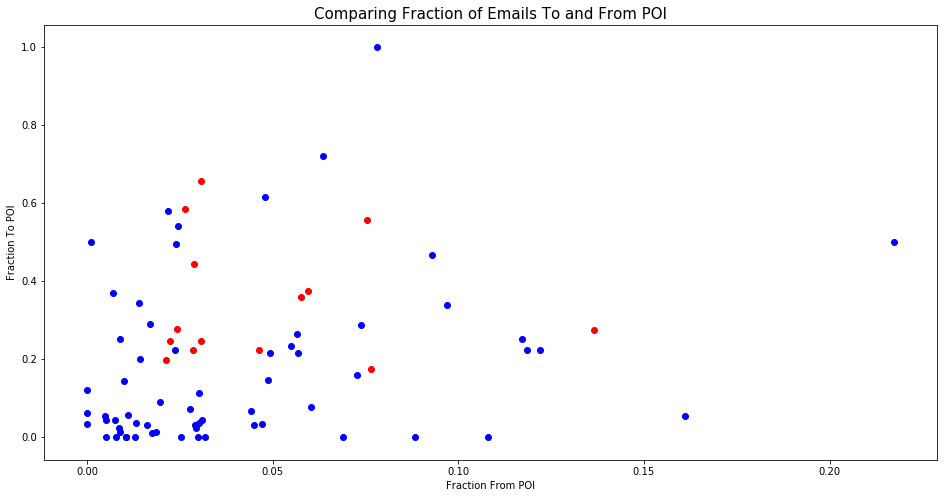

In [49]:
plot_list = ['poi','fraction_from_poi','fraction_to_poi'] # features used for scatter
scatter_data = featureFormat(data_dict, plot_list)


plt.figure(figsize = (16, 8))

for i in scatter_data: # features list
    from_poi = i[1] # 2nd feature in list, 0 based
    to_poi = i[2] # 3rd feature in list, 0 based
    if i[0]== True: # if POI
        plt.scatter(from_poi,to_poi,color ='red') # POI = red
    else:
        plt.scatter(from_poi,to_poi, color ='blue') 

#Giving labels for title, x, and y then changing their font size
plt.title('Comparing Fraction of Emails To and From POI', fontsize = 15)
plt.xlabel('Fraction From POI')
plt.ylabel('Fraction To POI')
plt.show()

Using fractions to compare emails being sent really helped display our data more clearly.  POI(red) are more visually separated from non POI(blue).  This could mean our new features will be used in our algorithm testing.

#### Univariate Features

Now that we have created two new features for our list, it's time to univariate and find out which features will be the best to use for our upcoming testing, and if these two new features are important enough to stay. 

##### Quoting from Lesson 12: Feature Selection
>There are two big univariate feature selection tools in sklearn: SelectPercentile and SelectKBest. The difference is pretty apparent by the names: SelectPercentile selects the X% of features that are most powerful (where X is a parameter) and SelectKBest selects the K features that are most powerful (where K is a parameter).

I want to use **SelectKBest** to find out the best features to use because our dictionary seems small enough to not have to find the percentage of powerful features.  I believe that SelectPercentile would be more suited for data with hundreds of features so it can narrow them down to a managable chunk.   

This will return 

In [50]:
from sklearn.feature_selection import SelectKBest

# full list of features
features_list =  ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances',
                  'bonus', 'restricted_stock_deferred', 'deferred_income',
                  'total_stock_value', 'expenses', 'exercised_stock_options',
                  'other', 'long_term_incentive', 'restricted_stock', 'director_fees',
                  'to_messages', 'from_poi_to_this_person','from_messages',
                  'from_this_person_to_poi', 'shared_receipt_with_poi', 'fraction_from_poi', 'fraction_to_poi'
                 ]
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


f_score = SelectKBest(k = 'all').fit(features, labels) # return all feature scores
print f_score.scores_





[18.28968404  0.22461127  8.77277773  7.18405566 20.79225205  0.06549965
 11.45847658 24.18289868  6.09417331 24.81507973  4.18747751  9.92218601
  9.21281062  2.1263278   1.64634113  5.24344971  0.16970095  2.38261211
  8.58942073  3.12809175 16.40971255]


Based on the F1 scores, our top 5 features  in the dataset are:

> 'loan_advances'

> 'restricted_stock_deferred'

> 'deferred_income'

> 'expenses'

> 'fraction_to_poi'

To finalize our selection of features used, I want to manually create a few sets of features and compare the results of each to see which set performs best through Decision Tree. These will be run in our tester.py file. Our first set will be the top 5 scores.

First, I want to see how our created feature (fraction_to_poi) changes our scores if it is removed from our first list.  I also want to see if the amount of features affects our results.



In [51]:
#features_list0 = ['loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses']
#features_list1 = ['loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses', 'fraction_to_poi']
#features_list2 = ['loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses', 'fraction_to_poi', 'long_term_incentive']
#features_list3 = ['loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses', 'fraction_to_poi', 'deferral_payments']


**features_list0 results**: Accuracy: 0.81583       Precision: 0.22222      Recall: 0.04200 F1: 0.07065

**features_list1 results**: Accuracy: 0.80923       Precision: 0.37915      Recall: 0.37650 F1: 0.37782

**features_list2 results**: Accuracy: 0.82477       Precision: 0.42872      Recall: 0.41800 F1: 0.42329

**features_list3 results**: Accuracy: 0.81957       Precision: 0.35906      Recall: 0.33500 F1: 0.34661

When excluding our created feature 'fraction_to_poi, our results were very lacking.  Our recall score was extremely low and F1 also very low.  We added the feature back in the list and it gave us much better results.

However, based on our approach, features_list2 returned the highest scores. It included a total of six features as compared to four or five.  We will be using this as our list for testing.

In [52]:
features_list = ['poi', 'loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses', 'fraction_to_poi', 'long_term_incentive']### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Using Classifiers With Feature List

Now it's time to run our final features list through a few algorithms using  the test_classifier function in tester.py and see which one will give us the best scores.

We want **Precision** and **Recall** to be over a .3 score.


In [53]:
# used for testing each algorithm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

#### Decision Tree Results

Accuracy: 0.82815       Precision: 0.43944      Recall: 0.42450  F1: 0.43184 

#### Naive Bayes Results

Accuracy: 0.41392       Precision: 0.18591      Recall: 0.83150  F1: 0.30388

#### Random Forest Results

Accuracy: 0.82692       Precision: 0.34453      Recall: 0.13850  F1: 0.19757

Based on our classifier tests, Decision Tree provided us with higher all around scores.  Naive Bayes had an abysmally low accuracy score so it was kicked to the curb.  Random Forest had a similar accuracy to Decision Tree but Decision Tree had the upper advantage with all scores.

Decision Tree will be our Algorithm of choice.

### Algorithm Tuning

Before we finalize our algorithm, let's tune some parameters to try and achieve better scores.  The default parameters will be run through our test.py file to perform validation, and the tuned parameters will also be run through our data.py file for validation using ***StratifiedShuffleSplit***.  We will compare our findings.

#### Decision Tree Parameters

For our research, we will be using GridSearchCV to find the best combination of tuning for these parameters:

>'min_samples_leaf'

>'min_samples_split'



In [54]:
from sklearn.model_selection import GridSearchCV

param_tuning = {
    'min_samples_leaf': [1, 3, 5, 7, 9, 11],
    'min_samples_split': [3, 5, 7, 9, 11, 13]
}

clf = GridSearchCV(DecisionTreeClassifier(), param_tuning)
clf = clf.fit(features_train, labels_train)


print "Best parameters for Decision Tree are:", clf.best_params_


Best parameters for Decision Tree are: {'min_samples_split': 3, 'min_samples_leaf': 11}


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


When using our **tuned parameters** and running Decision Tree again, our results were:

Accuracy: 0.84508       Precision: 0.49562      Recall: 0.39600  F1: 0.44024

Compared to our **default parameters**:

Accuracy: 0.82815       Precision: 0.43944      Recall: 0.42450  F1: 0.43184 

Our tuned features increased all of our scores, giving us better results.

# Summarizing Markdown From the Project and Answering Questions

Most of the questions below were answered in the markdown throughout the notebook, but I will be reflecting back on what was said and condense it in this section below.

### Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

The goal of this project was to find potential POI in the Enron dataset provided.  In 2000, Enron was one of the largest companies in the United States and by 2002, it had collapsed into bankruptcy due to widespread corporate fraud. Thousands of emails involved in the scandal were released to the public along with the people who sent them.  Our dataset included 146 people with a small amount (18) listed as POI. 21 features described each person and those features were what we explored throughout the project.

Machine learning was very useful and played a major role in our end goal because it utilized the amount of data we were given.  It aided in our search to find any additional people that weren't originally flagged as a POI but were suspicious enough to have potentially played a bigger role in the scandal.

There were a couple outliers that were identified during our exploration.   "TOTAL" and "THE TRAVEL AGENCY IN THE PARK" were removed from our dataset because it was revealed that "TOTAL" was actually the total sum of each feature column for everyone in the dataset. "THE TRAVEL AGENCY IN THE PARK" was removed because this 'person' was not actually a person and wasn't going to  contribute to our focus of the people involved at Enron.

### What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]

The features were 'loan_advances','restricted_stock_deferred','deferred_income', 'expenses','fraction_to_poi', and 'long_term_incentive'. These were some of the highest scored by SelectKBest. It selects the K features that are most powerful (where K is a parameter) and would be the best at determing whether or not a person could identify as POI.

>**Features that are selected are reported and the number of features selected is justified.**

This features list was selected by hand after different combinations of features were tested, and the performance was documented for each one.  The amount of features was also taken into consideration when testing, and it looked like having a total of 6 features provided the best results, versus only having 5.

```python
#features_list0 = ['loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses']
#features_list1 = ['loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses', 'fraction_to_poi']
#features_list2 = ['loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses', 'fraction_to_poi', 'long_term_incentive']
#features_list3 = ['loan_advances', 'restricted_stock_deferred', 'deferred_income', 'expenses', 'fraction_to_poi', 'deferral_payments']
```
**features_list0 results**: Accuracy: 0.81583       Precision: 0.22222      Recall: 0.04200 F1: 0.07065

**features_list1 results**: Accuracy: 0.80923       Precision: 0.37915      Recall: 0.37650 F1: 0.37782

**features_list2 results**: Accuracy: 0.82477       Precision: 0.42872      Recall: 0.41800 F1: 0.42329

**features_list3 results**: Accuracy: 0.81957       Precision: 0.35906      Recall: 0.33500 F1: 0.34661
        
>**If algorithm calls for scaled features, feature scaling is deployed.**

I did not have to do any scaling because it is not necessary to perform in decision trees, as it is unaffected by scaling of any kind.

Two new features were created during the analysis, 'fraction_from_poi' and 'fraction_to_poi'.  They were created due to the amount of emails being sent to and from people/POI and wanting to narrow down the actual ratio of emails being sent to important people(POI) as well as the ratio of emails being sent from POI. That way our scope was narrowed down a little more to focus on POI.  We didn't need to know how many emails were being sent to and from non POI.



>**At least one new feature is implemented. Justification for that feature is provided in the written response.**

**Removing new feature(features_list0)**: Accuracy: 0.81583       Precision: 0.22222      Recall: 0.04200  F1: 0.07065

**Adding new feature(features_list1)**: Accuracy: 0.80923       Precision: 0.37915      Recall: 0.37650  F1: 0.37782

After initially running our list of features without 'fraction_to_poi', our results were very poor, resulting in much lower scores.  When I added the created feature back to our list, or scores became much better and already reached our task of > .3 precision and recall score.



### What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

The algorithm I ended up using was Decision Tree.  I analyzed three:  **Decision Tree, Naive Bayes, and Random Forest**.  Decision Tree had an all around better average score.  Accuracy was lacking but I want to contribute that to the ratio of POI to non POI being heavily weighed. In our data, about 14% of people are marked as POI, leaving around 86% as non POI.

### What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]

Parameter tuning helps an algorithm return the highest evaluation scores.  If this isn't done well, the outcome of the algorithm can not maximize its power and give you results that are lackluster for your analysis.  For Decision Tree, I tuned **'min_samples_leaf' and 'min_samples_split'**.  As quoted from Scikit Learn, 'min_samples_leaf' is the minimum number of samples required to be at a leaf node.  'min_samples_split' is the minimum number of samples needed to be considered a leaf node.  Tuning both of these provided a large boost in precision, accuracy, and recall as well as F1 score.



### What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]

Validation of data is the process that ensures that the model used is performing correctly and consistently with any dataset it may use.  For example, for this project our data was split into unique sets for training and validation purposes.  Incorrectly validating data can result in 'overfitting' or 'underfitting'.  Overfitting is caused by the model performing great on the training data but not the validation data.  Underfitting is quite the opposite and performs poorly on training data.  

I validated the analysis for this project by using the classifier function in the tester.py file.  This function utilizes a module called 'StratifiedShuffleSplit', which creates the unqiue training/validation sets and then outputs the model scores. This returns stratified randomized folds, or essentially sets of data made by preserving the percentage of samples for each class. This validation process is ideal for the smaller Enron dataset.  

### Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

The two metrics that were the main focus for this project were **'recall' and 'precision'**.  Accuracy and F1 scores were also looked at. According to Scikit Learn:

**Precision** is defined as the number of true positives over the number of true positives plus the number of false positives.

**Recall**  is defined as the number of true positives over the number of true positives plus the number of false negatives.

These quantities are also related to the **F1 score**, which is defined as the harmonic mean of precision and recall.

When using our **tuned parameters** and running Decision Tree again, our results were:

Accuracy: 0.84508       Precision: 0.49562      Recall: 0.39600  F1: 0.44024

We can look at our Accuracy as 84.5%, meaning how accurate our predictions were on the total test data.
Precision means that 49.5%% of the people labeled as 'POI' are actually a POI in the dataset.
Recall means that 39.6% of the people labeled as POI in the dataset will be correctly classified as a POI by the algorithm.
Finally, F1 basically represents how accurate the testing was.  

The overall results of the analysis were fair, considering that our ratio of POI to non POI was heavily one sided.



### References

##### Github
https://github.com/andrewsanmartin

https://github.com/ketanpandey01

##### Other Websites
https://scikit-learn.org 

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

